In [87]:
import pandas as pd
df = pd.read_csv('./sample_data/california_housing_train.csv')
y = df['median_house_value']
X = df.drop(['median_house_value'], axis = 'columns')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)
X_test.shape

(5100, 8)

In [89]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt

def train_model(degree):
    steps = [("imp_mean", SimpleImputer()),
              ("scale", StandardScaler()),
              ("polytransform", PolynomialFeatures(degree = degree)),
                ("linear", LinearRegression()) ]

    pipeline = Pipeline(steps)

    model = pipeline.fit(X_train, y_train)
    #joblib.dump(model,'modelsteps.joblib')

    y_pred = model.predict(X_train)

    mae = mean_absolute_error(y_train, y_pred)
    mse = mean_squared_error(y_train, y_pred)
    r2 = r2_score(y_train,y_pred)
    #print('mae:', round(mae), 'mse:', round(mse), 'r2 score:', round(r2, 2))

    y_predt = model.predict(X_test)

    mae_t= mean_absolute_error(y_test, y_predt)
    mse_t = mean_squared_error(y_test, y_predt)
    r2_t = r2_score(y_test,y_predt)

    return mae, mse, r2, mae_t, mse_t, r2_t

In [90]:
r2List = []
r2_tList = []
for degree in range(1, 5):
    mae, mse, r2, mae_t, mse_t, r2_t = train_model(degree)
    r2List.append(round(r2, 2))
    r2_tList.append(round(r2_t, 2))

    #print('degree', round(degree), 'mae:',round(mae), 'mse:',round(mse), 'r2 score:' , round(r2,2), 'mae_t:' ,round(mae_t)  , 'mse_t:' , round(mse_t), 'r2_t score:' , round(r2_t,2))


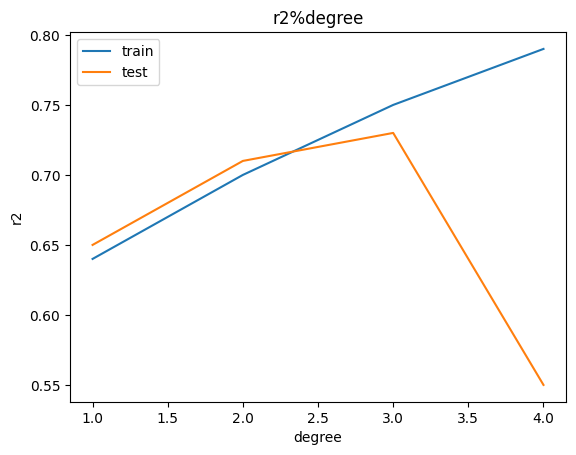

In [91]:

dfr2 = pd.DataFrame({'degree':[1,2,3,4], 'train': r2List, 'test': r2_tList})
dfr2

dfr2.plot(x='degree', y=['train', 'test'], kind='line', title='r2%degree')
plt.xlabel('degree')
plt.ylabel('r2')
plt.show()


In [92]:
steps = [("imp_mean", SimpleImputer()),
              ("scale", StandardScaler()),
              ("polytransform", PolynomialFeatures(degree = 3)),
                ("linear", LinearRegression()) ]

pipeline = Pipeline(steps)

model = pipeline.fit(X_train, y_train)
joblib.dump(model,'modelsteps.joblib')

['modelsteps.joblib']